In [1]:
import sys
sys.path.append("../code/")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from create_matrix import *
from common import create_region_df_dfc_static

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']

import os

In [4]:
def get_tensor(df):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()
    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())

    #dfc = df.copy()

    df = df[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [5]:
region = 'Austin'
year = 2014

df, dfc, tensor, static_region = create_region_df_dfc_static(region, year, start=1, stop=13)

In [6]:
from tensor_custom_core import learn_HBAT_adagrad_graph

In [7]:
H, B, A, T, Hs, As, Ts, HBATs, costs = learn_HBAT_adagrad_graph(tensor, 2, 2, lr = 1, dis=True)

498.116754933
83.1590269331
79.6381511077
78.9532802887
78.6812816831
78.5173241274
78.4452058099
78.3811814305
78.3246961795
78.285479445
78.2412808968
78.207098422
78.1764752717
78.1508481999
78.1270543074
78.105278125
78.0845568331
78.0652211369
78.0470107641
78.0299693321


In [9]:
%matplotlib inline

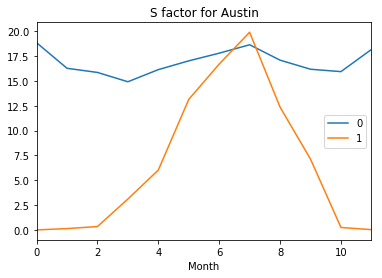

In [10]:
pd.DataFrame(T).T.plot()
plt.xlabel("Month")
plt.title("S factor for Austin")

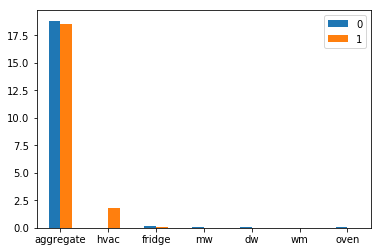

In [11]:
pd.DataFrame(A, index=APPLIANCES_ORDER).plot(kind='bar', rot=0)

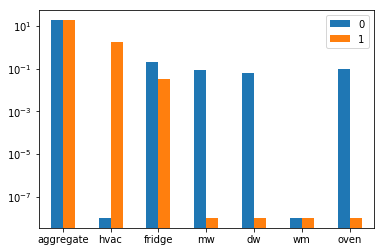

In [12]:
pd.DataFrame(A, index=APPLIANCES_ORDER).plot(kind='bar', rot=0, logy=True)
#plt.ylim((0, 0.1))

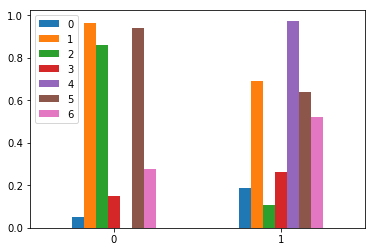

In [15]:
e = pd.DataFrame(B)
#e.index = APPLIANCES_ORDER
e.plot(kind='bar',rot=0)

In [57]:
B.shape

(1, 7)

In [38]:
A.shape

(7, 2)

In [16]:
pd.DataFrame(H).corrwith(pd.Series(static_region[:,0]))

0    0.328510
1    0.690387
dtype: float64

ValueError: x and y must be the same size

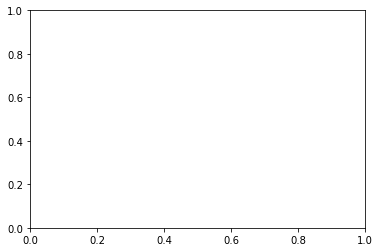

In [17]:
plt.scatter(pd.DataFrame(H), pd.Series(static_region[:,0]))
plt.xlabel("Home factor")
plt.ylabel("Area")

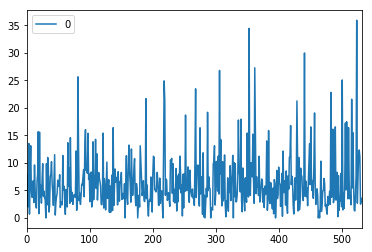

In [26]:
pd.DataFrame(H[:,1]).plot()